In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required libraries
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

Importing the dataset into from the drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/concrete_data.csv")

Displaying the Dataset

In [ ]:
df.head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


Displaying the columns and rows present in the dataset

In [ ]:
# Data Structuring
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])
print(df.info())

Number of rows 1030
Number of columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


Finding the Missing Values 

In [ ]:
# Missing Values
print('Number of missing values', df.isnull().sum())
'The dataset contains no missing values'

Number of missing values cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


'The dataset contains no missing values'

Renaming the column names

In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

Data Description

In [ ]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Heat Map 

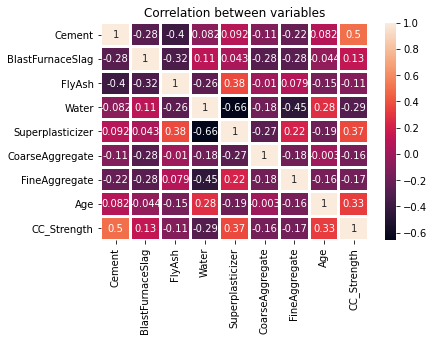

In [ ]:
sns.heatmap(data.corr(), annot=True, linewidth=2)
plt.title("Correlation between variables")
plt.show()

Observations:
 

*  There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.
*   Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.



*   Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.
We can further analyze these correlations visually by plotting these relations.







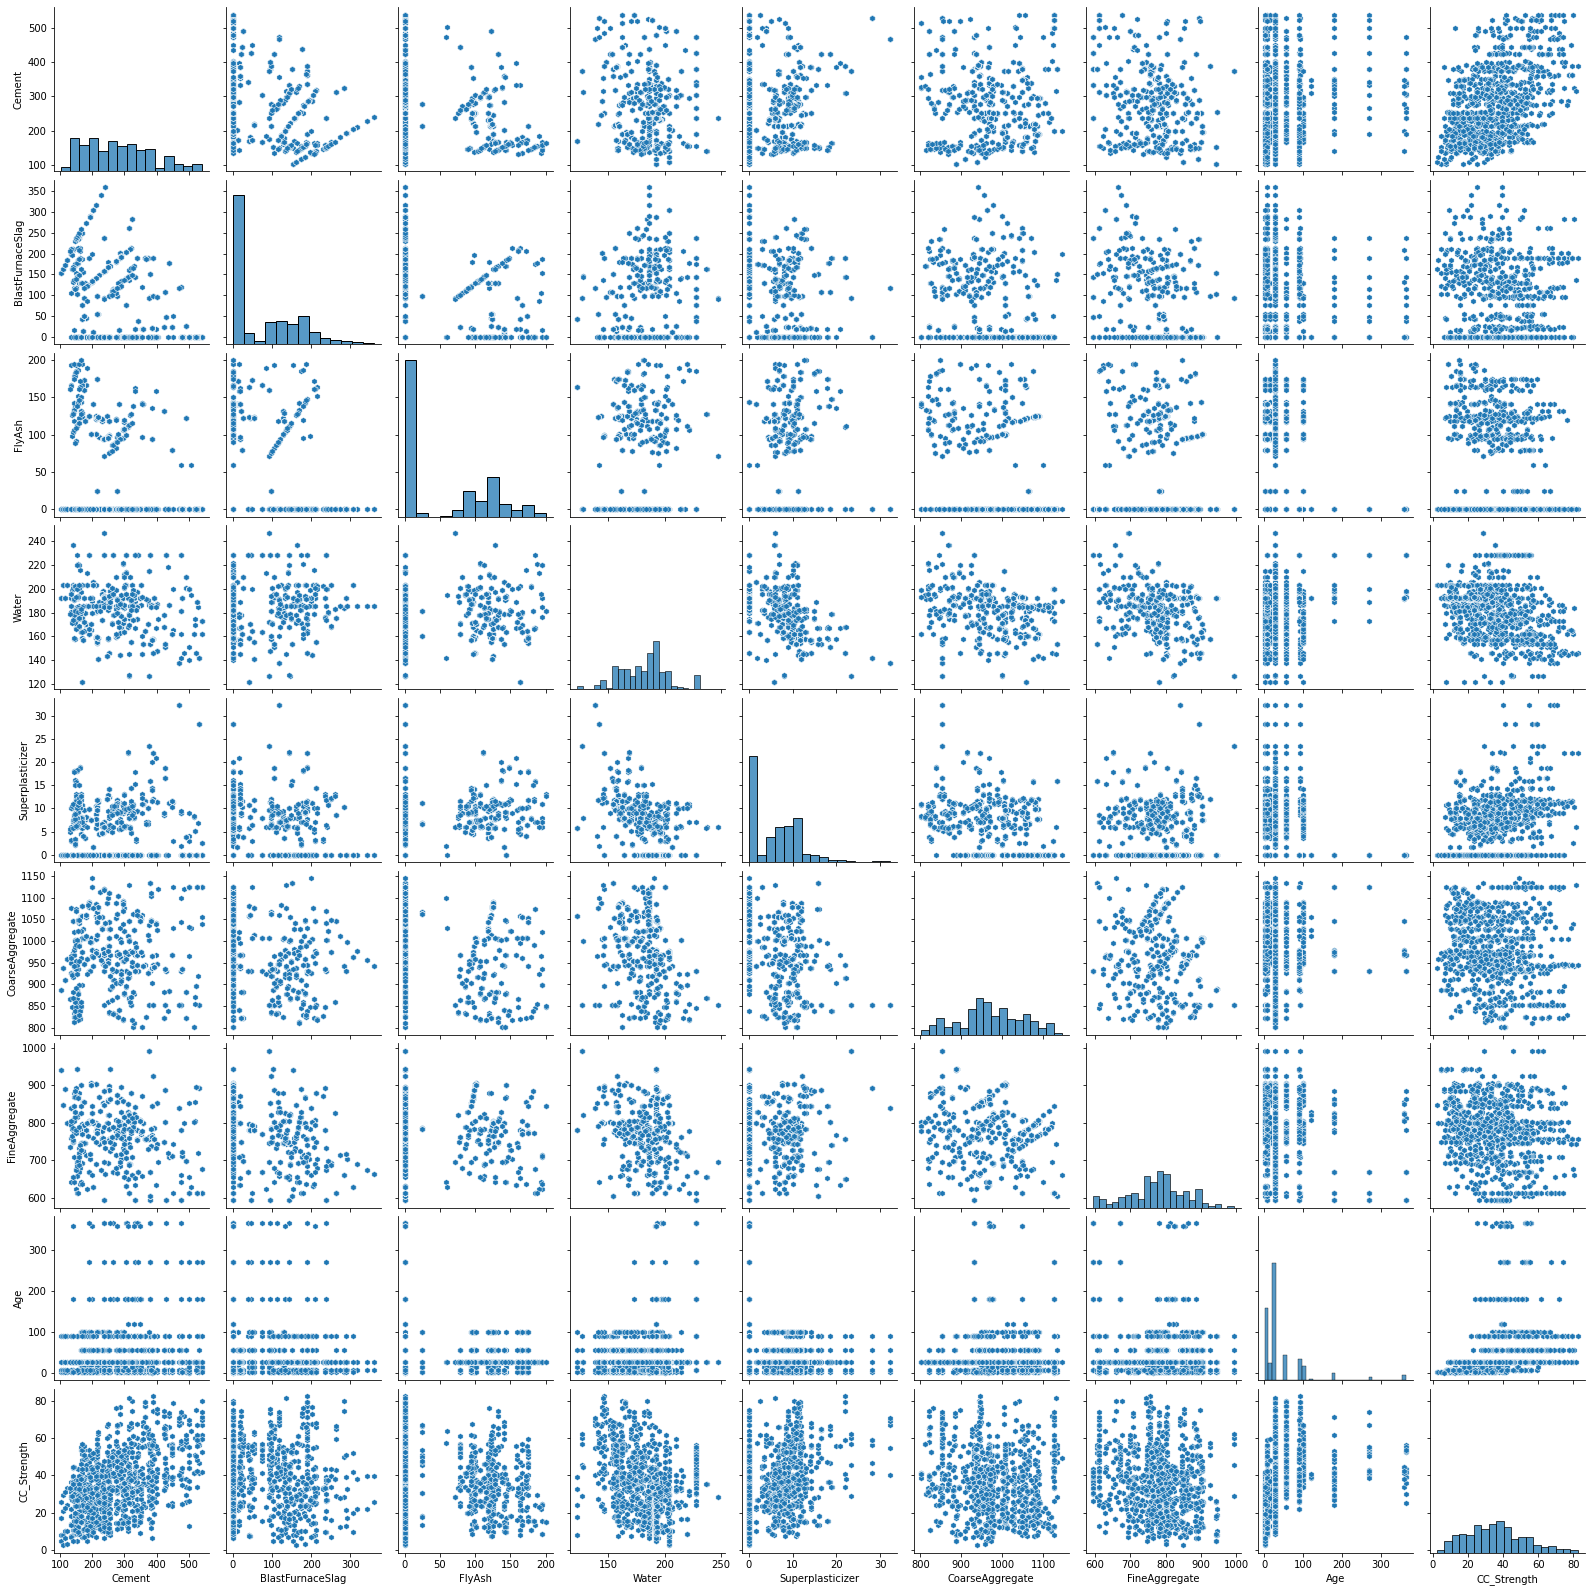

In [ ]:
sns.pairplot(data,markers="h")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of concrete strength')

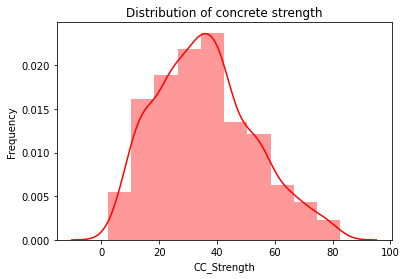

In [ ]:
#3 Distribution plot
sns.distplot(data['CC_Strength'], bins=10, color='r')
plt.ylabel("Frequency")
plt.title('Distribution of concrete strength')

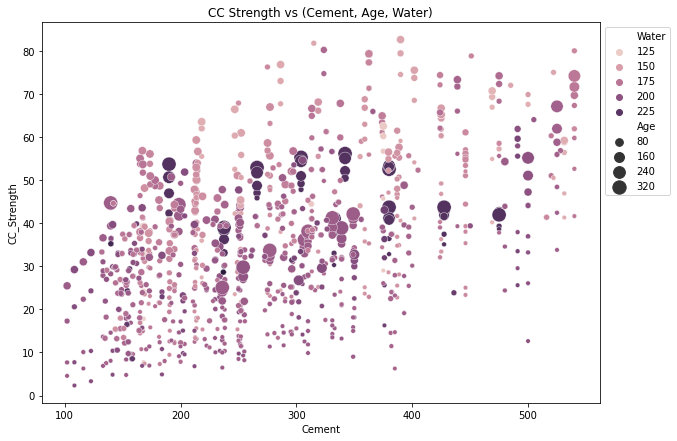

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Observations from Strength vs (Cement, Age, Water)

*   Compressive strength increases with amount of cement
*   Cement with low age requires more cement for higher strength
*   The older the cement is the more water it requires
*   Concrete strength increases when less water is used in preparing it
*   Compressive strength increases with age



Data Preprocessing

In [ ]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1] 

In [ ]:
# splitting of data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.


 Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

- The Go-to method for Regression problems. 
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function. 
- The objective function used in this case is Mean Squared Error. 
- There are three versions of Linear Regression
    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
   
We will compare these three algorithms


In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr


array([27.59040946, 22.6387881 , 17.85253903, 32.28016745, 31.69451618,
       38.23815475, 30.31743389, 51.79006286, 19.04693117, 10.84739247,
       21.88595615, 27.02447869, 54.52301557, 44.78610961, 32.54164879,
       54.52301557, 26.58582207, 38.26229495, 61.23986267, 28.55821983,
       20.05599578, 27.20876399, 23.33110475, 17.73603412, 37.14946311,
       25.25299743, 43.84757654, 36.29497932, 22.76436008, 25.54798024,
       55.19475365, 22.7962835 , 24.79863077, 49.4923    , 41.65970767,
       18.15942939, 31.28951093, 20.2166102 , 38.29173689, 28.43709695,
       60.10872283, 35.17724771, 23.79142052, 36.09788169, 42.62302413,
       34.53987699, 26.14678366, 16.24243352, 67.64312694, 23.9331589 ,
       25.4583339 , 37.98567938, 64.25837713, 46.98221763, 33.7844206 ,
       43.57007216, 25.44368318, 38.16302936, 33.39796744, 37.91292943,
       54.20462631, 48.44801701, 28.61035186, 26.12004216, 47.73318363,
       16.22869952, 23.10395736, 35.36838225, 61.09166714, 23.13

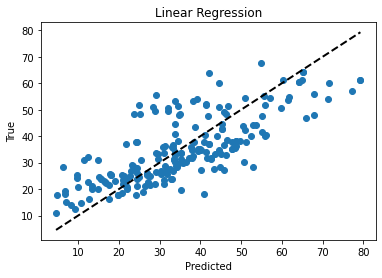

In [ ]:
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

In [ ]:
#Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([28.86543535, 25.20041285, 24.94484221, 29.97911935, 34.41312737,
       37.0562295 , 26.23659351, 48.58103225, 25.29442899, 16.16697209,
       25.10130738, 29.80738395, 50.64331601, 43.32647674, 28.39836116,
       50.64331601, 24.91307238, 40.02717572, 60.3547414 , 29.54407465,
       19.70703714, 31.37806803, 27.99635678, 21.15871163, 37.66526002,
       27.66795621, 40.13090492, 34.48894846, 25.17203308, 29.3148616 ,
       51.86171465, 28.2672743 , 26.19621621, 45.77163295, 36.54008103,
       22.63646076, 30.67908941, 26.38854928, 37.74476362, 31.99738779,
       51.71332261, 34.74647169, 25.59235345, 36.65416603, 43.09400955,
       35.84573041, 30.39695687, 23.79001249, 68.32988777, 25.42490883,
       30.33268161, 33.9316063 , 60.25288968, 43.88798488, 30.16376796,
       39.02070218, 30.37747478, 39.18669977, 32.83525161, 37.57414341,
       50.54037328, 41.83530461, 28.87118175, 27.20681956, 46.98117658,
       23.26154761, 29.02201729, 30.66840108, 55.73732835, 27.46

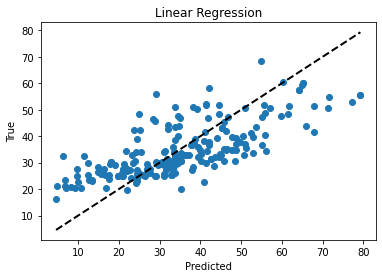

In [ ]:
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([27.53596375, 22.67014579, 17.94592623, 32.20667685, 31.75747975,
       38.16518081, 30.25176511, 51.80437736, 19.15039924, 10.88930433,
       21.91886444, 27.10968275, 54.52891208, 44.68259151, 32.47649049,
       54.52891208, 26.57394114, 38.34259285, 61.24420498, 28.50892198,
       19.95162156, 27.26879016, 23.39145373, 17.7705493 , 37.12052549,
       25.33280221, 43.82673131, 36.24995461, 22.73290837, 25.51170585,
       55.23812216, 22.91350213, 24.7090661 , 49.42410767, 41.5613735 ,
       18.23438332, 31.20229444, 20.29494195, 38.36921099, 28.47302756,
       59.83443201, 35.11370192, 23.73653369, 36.15513803, 42.69272627,
       34.44043335, 26.19187375, 16.33241553, 67.69923947, 23.89836236,
       25.64152701, 38.19371379, 64.18487217, 46.95466563, 33.78497795,
       43.49256691, 25.62735561, 38.21954644, 33.38521472, 38.00540474,
       54.13326376, 48.44832103, 28.58520628, 26.06936879, 47.79727509,
       16.29043838, 23.21554494, 35.25860301, 60.99909126, 23.04

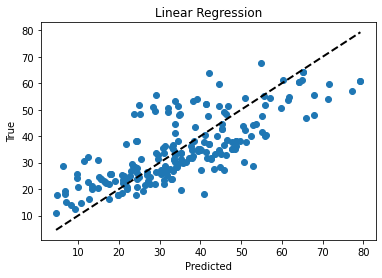

In [ ]:
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

Decision Trees

Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)
y_pred_dtr

array([31.35 , 16.5  , 19.77 , 17.2  , 34.68 , 51.96 , 44.64 , 29.355,
       24.89 ,  6.28 , 33.31 , 25.89 , 44.42 , 42.42 , 37.81 , 44.42 ,
       19.99 , 36.15 , 62.5  , 31.35 , 22.84 , 31.65 , 32.07 ,  6.9  ,
       51.04 , 26.92 , 39.7  , 33.04 , 12.18 , 31.45 , 55.55 , 22.53 ,
       23.25 , 30.45 , 53.66 , 24.05 , 24.1  , 18.91 , 52.2  , 32.72 ,
       44.21 , 27.77 , 29.65 , 33.02 , 49.9  , 41.05 , 27.83 , 17.54 ,
       55.6  , 33.66 , 13.2  , 31.12 , 65.2  , 65.91 , 28.99 , 57.22 ,
       13.2  , 43.06 , 42.55 , 38.46 , 71.3  , 46.23 , 31.12 , 29.93 ,
       41.54 , 13.71 , 25.56 , 39.7  , 79.3  , 14.7  , 30.14 , 24.1  ,
       46.24 , 42.33 , 53.1  , 24.05 , 21.07 , 29.65 , 35.23 , 29.75 ,
       37.43 , 25.46 , 24.5  , 14.7  , 50.24 , 22.72 , 17.22 , 29.355,
       41.89 , 66.42 , 15.09 , 47.13 , 29.93 ,  6.47 , 33.66 ,  9.01 ,
       53.66 , 25.37 , 17.96 , 24.44 , 24.1  , 11.41 , 30.65 , 34.67 ,
       29.73 , 29.355, 44.21 , 29.65 , 26.06 , 49.2  , 52.61 , 64.3  ,
      

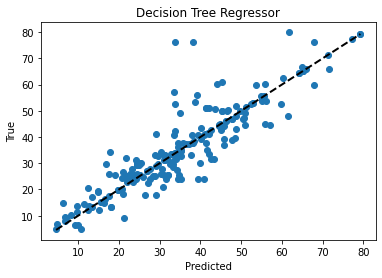

In [ ]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Random Forest Regressor

Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([39.0532    , 22.1123    , 19.7866    , 16.9272    , 37.6002    ,
       47.7828    , 31.5362    , 29.93604583, 26.1386    ,  5.3699    ,
       28.6781    , 25.9569    , 49.83111357, 34.28216667, 37.0524    ,
       49.83111357, 21.7772    , 34.8533    , 59.7271    , 37.4598    ,
       25.5443    , 31.985     , 31.3459    ,  7.9634    , 48.1506    ,
       26.6535    , 45.3009    , 37.9714    , 12.9216    , 32.7473    ,
       56.83930667, 22.554     , 27.7866    , 26.9818    , 51.6436    ,
       34.9214    , 35.7046    , 17.1506    , 45.1437    , 32.0461    ,
       42.2291    , 37.9966    , 28.3408    , 37.6464    , 48.9794    ,
       39.4492    , 34.6181    , 17.6886    , 50.84365   , 28.6063    ,
       17.2189    , 35.5876    , 64.7716    , 59.6201    , 28.2823    ,
       50.5906    , 17.2215    , 42.6735    , 40.5281    , 39.994     ,
       71.4094    , 45.688     , 35.4947    , 28.3142    , 42.052     ,
       13.0562    , 22.7268    , 45.7392    , 78.9236    , 18.88

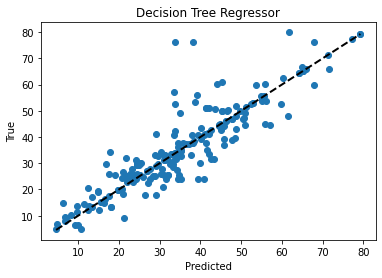

In [ ]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t\t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t\t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t\t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 		 10.28 		 105.76 	8.23 		0.57
LassoRegression 		 10.68 		 114.11 	8.65 		0.54
RidgeRegression 		 10.29 		 105.84 	8.24 		0.57
Decision Tree Regressor 	 7.34 		 53.93 		4.50 		0.78
Random Forest Regressor 	 5.19 		 26.94 		3.55 		0.89


- The RMSE with Linear Regressor is now 10.28 .
- The RMSE with Lasso Regressor is now 10.68 .
- The RMSE with Ridge Regressor is now 10.29.
- The Root Mean Squared Error (RMSE) has come down from 10.29 to 6.69, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line. 
- The RMSE with Random Forest Regressor is now 5.17, we have reduced the error by ensembling multiple trees.

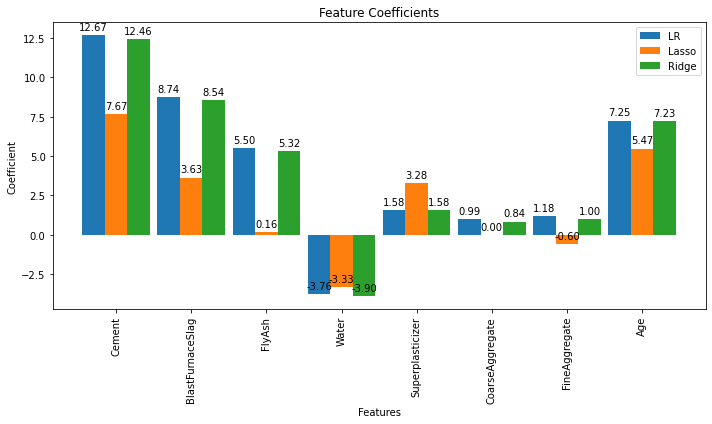

In [ ]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

Cement and Age are treated as the most important features by the above based .Water, Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.

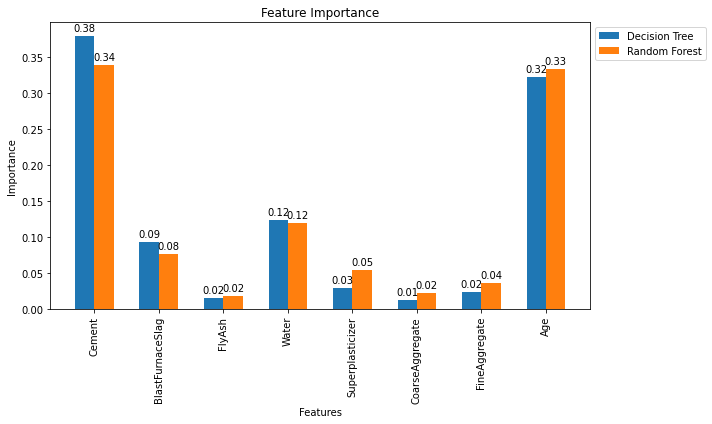

In [ ]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Cement and Age are treated as the most important features by tree based models. Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.

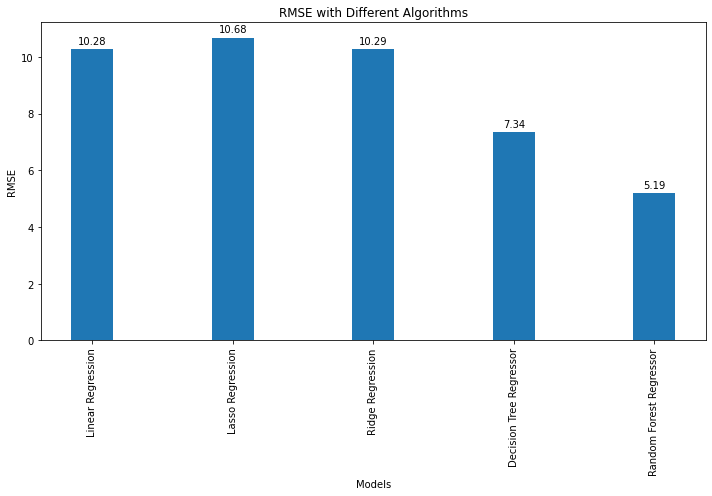

In [ ]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=90)
autolabel(rects)
fig.tight_layout()
plt.show()

Conclusion
Random Forest Regressor is the best choice for this problem.
and Cement, age and super plasticizer are the features which are used in the compressive strength of concrete

In [ ]:
os.listdir("/content/drive/MyDrive/crack-identification-ce784a-2020-iitk")

['concrete_data.csv',
 'ReadMe.txt',
 'sample-submission.csv',
 'train',
 'test',
 'ea11056c2a9f4be489961cda10cda948.jpg',
 'e63f917750926bd250eea8322075d869.jpg',
 'download.jpg']

In [ ]:
os.listdir("/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/train")

['cracked', 'uncracked']

In [ ]:
# categories in the data set
base_path = '/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/train'
categories = ['cracked', 'uncracked']

In [ ]:
mapping = {}
count = 0
for i in categories:
    mapping[count] = i
    count+=1

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/train/cracked")))

7501


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/train/uncracked")))

7467


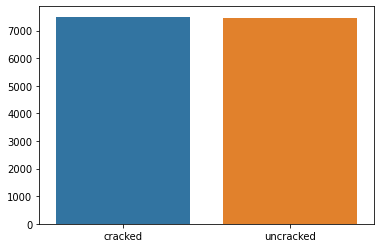

In [ ]:
import seaborn as sns
sns.barplot(x=['cracked', 'uncracked'] , y=[len(os.listdir(base_path+'/cracked')),
                                           len(os.listdir(base_path+'/uncracked'))])
                                                                 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
C = 2
batch_size = 64
nb_epochs = 30
train_data_dir = '/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/train'

# all the images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

# flow traing images in batches of 64 using  train_data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # This is the source directory for training images
    target_size=(img_height, img_width),  # All images will be resized to 150x150
    batch_size=batch_size,
    shuffle = True,

# Since we use Categoricalrossentropy loss, we need categorical labels

    class_mode='categorical',
    subset='training') # set as training data

# Flow validation images in batches of 64 using val_datagen generator

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 11975 images belonging to 2 classes.
Found 2993 images belonging to 2 classes.


(64, 150, 150, 3)
(64, 2)


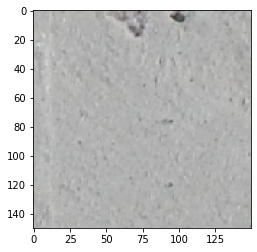

In [ ]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:]) # do display image

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


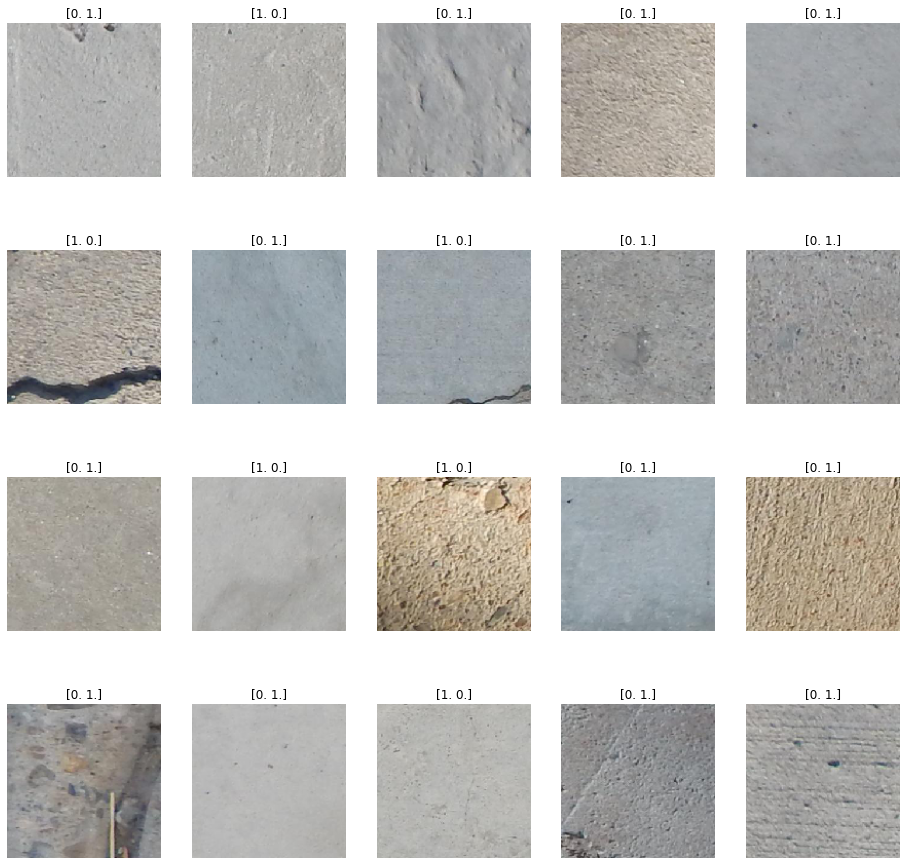

In [ ]:
plt.figure(figsize=(16,16))
pos=1 ## plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])# to display image
  plt.title(labels[i])
  plt.axis('off')
  pos +=1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout

In [ ]:
model = Sequential()
## add a conv layer followed by maxpooling

# First convolution extracts 32 filters that are 5x5
# Convolution is followed by max-pooling layer with a 2x2 window

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# params = ((n*m*k)+1)*f = ((5*5*3)+1)*32=2432

# Second convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# params = ((n*m*k)+1)*f = ((3*3*32)+1)*64=18496

# Third convolution extracts 96 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# params = ((n*m*k)+1)*f = ((3*3*64)+1)*96=55392

# fourth convolution extracts 96 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# params = ((n*m*k)+1)*f = ((3*3*96)+1)*96= 83040 


model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers

model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units

model.add(Dense(512,activation='relu'))

# params = ((n*m*k)+1)*f = ((3*3*96)+1)*512= 3981824 

model.add(Dense(512,activation='relu'))

# Create output layer with a multiple node and softmax activation

model.add(Dense(2, activation = "sigmoid"))

# let us see the summmary of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 96)       

In [ ]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator,batch_size=20)

Epoch 1/30
188/188 [==============================] - 36s 188ms/step - loss: 0.7168 - accuracy: 0.5082 - val_loss: 0.6955 - val_accuracy: 0.5012
Epoch 2/30
188/188 [==============================] - 35s 188ms/step - loss: 0.7366 - accuracy: 0.5250 - val_loss: 0.6427 - val_accuracy: 0.6098
Epoch 3/30
188/188 [==============================] - 36s 191ms/step - loss: 0.6576 - accuracy: 0.5973 - val_loss: 0.7135 - val_accuracy: 0.5473
Epoch 4/30
188/188 [==============================] - 37s 195ms/step - loss: 0.6181 - accuracy: 0.6542 - val_loss: 0.5630 - val_accuracy: 0.6946
Epoch 5/30
188/188 [==============================] - 35s 188ms/step - loss: 0.5853 - accuracy: 0.6869 - val_loss: 0.7200 - val_accuracy: 0.5289
Epoch 6/30
188/188 [==============================] - 35s 187ms/step - loss: 0.5695 - accuracy: 0.6962 - val_loss: 0.5325 - val_accuracy: 0.7240
Epoch 7/30
188/188 [==============================] - 35s 188ms/step - loss: 0.5275 - accuracy: 0.7282 - val_loss: 0.5250 - val_ac

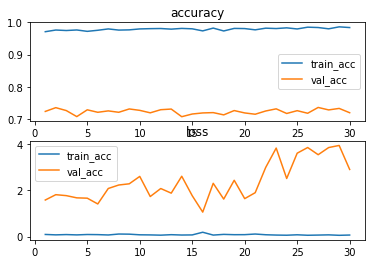

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs=list(range(1,31))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()


plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_acc')
plt.plot(epochs,val_loss,label='val_acc')
plt.title('loss')
plt.legend()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(450, 650, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


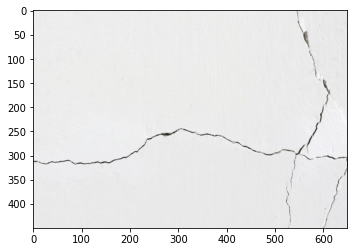

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/Test Image 1.jpg')
print(type(img))
plt.imshow(img)
#print(img.shape)

img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))

#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img).round(3)

array([[1., 0.]], dtype=float32)

In [ ]:
print(f"The Photo is in the category of {mapping[model.predict_classes(img)[0]]}")

The Photo is in the category of cracked


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1600, 1600, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


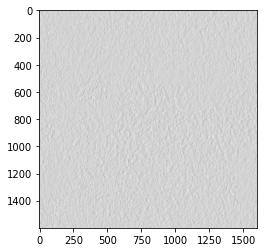

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/Test Image 3.jpg')
print(type(img))
plt.imshow(img)
#print(img.shape)

img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))

#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img).round(3)

array([[0.595, 0.73 ]], dtype=float32)

In [ ]:
  print(f"The Photo is in the category of {mapping[model.predict_classes(img)[0]]}")

The Photo is in the category of uncracked


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(450, 650, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


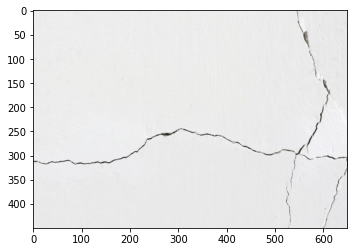

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/MyDrive/crack-identification-ce784a-2020-iitk/Test Image 1.jpg')
print(type(img))
plt.imshow(img)
#print(img.shape)

img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))

#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img).round(3)

array([[1., 0.]], dtype=float32)

In [ ]:
  print(f"The Photo is in the category of {mapping[model.predict_classes(img)[0]]}")

The Photo is in the category of cracked


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
